In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

# [Tutorials](https://pycaret.gitbook.io/docs/get-started/tutorials)

## [Regression Tutorial (REG101) - Level Beginner](https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)

Created using: PyCaret 2.2

Date Updated: November 25, 2020

### 1.0 Tutorial Objective

Welcome to Regression Tutorial (REG101) - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with Regression using the `pycaret.regression` Module.

In this tutorial we will learn:

- **Getting Data** : How to import data from PyCaret repository

- **Setting up Environment** : How to setup an experiment in PyCaret and get started with building regression models

- **Create Model** : How to create a model, perform cross validation and evaluate regression metrics

- **Tune Model** : How to automatically tune the hyperparameters of a regression model

- **Plot Model** : How to analyze model performance using various plots

- **Finalize Model** : How to finalize the best model at the end of the experiment

- **Predict Model** : How to make prediction on new / unseen data

- **Save / Load Model** : How to save / load a model for future use

Read Time : Approx. 30 Minutes

### 1.0 チュートリアルの目的

Regression Tutorial (REG101) - Level Beginner へようこそ。このチュートリアルは、あなたが PyCaret の初心者で、 `pycaret.regression` モジュールを使って Regression を始めようとしていると仮定しています。

このチュートリアルでは、以下のことを学びます。

- **Getting Data** : PyCaretのリポジトリからデータをインポートする方法

- **Setting up Environment** : PyCaretで実験をセットアップし、回帰モデルを構築する方法

- **Create Model** : モデルの作成方法、交差検証の実施、回帰指標の評価方法

- **Tune Model** : 回帰モデルのハイパーパラメータを自動的にチューニングする方法

- **Plot Model** : さまざまなプロットを用いてモデルの性能を分析する方法

- **Finalize Model** : 実験終了時に最適なモデルを確定させる方法

- **Predict Model** : 新しい/未知のデータに対して予測を行う方法

- **Save / Load Model** : モデルを保存/読み込みする方法

読書時間：約30分

#### 1.1 Installing PyCaret

The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### 1.1 PyCaret のインストール

PyCaret を使い始めるための最初のステップは、pycaret をインストールすることです。インストールは簡単で、数分しかかかりません。以下の手順に従ってください。

##### Installing PyCaret in Local Jupyter Notebook

##### ローカルの Jupyter Notebook に PyCaret をインストールする

`pip install pycaret`

### 2.0 What is Regression?

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable', or 'target') and one or more independent variables (often called 'features', 'predictors', or 'covariates'). The objective of regression in machine learning is to predict continuous values such as sales amount, quantity, temperature etc.

[Learn More about Regression](https://hbr.org/2015/11/a-refresher-on-regression-analysis)

### 2.0 回帰分析とは?

回帰分析とは、従属変数（しばしば「結果変数」または「ターゲット」と呼ばれる）と1つ以上の独立変数（しばしば「特徴」、「予測変数」または「共変量」と呼ばれる）の関係を推定するための一連の統計処理である。機械学習における回帰の目的は、売上金額、数量、温度などの連続値を予測することです。

[回帰についてもっと詳しくはこちら](https://hbr.org/2015/11/a-refresher-on-regression-analysis)

### 3.0 Overview of the Regression Module in PyCaret

PyCaret's Regression module (`pycaret.regression`) is a supervised machine learning module which is used for predicting continuous values / outcomes using various techniques and algorithms. Regression can be used for predicting values / outcomes such as sales, units sold, temperature or any number which is continuous.

PyCaret's regression module has over 25 algorithms and 10 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's regression module has it all.

### 3.0 PyCaret の回帰モジュールの概要

yCaret の回帰モジュール (`pycaret.regression`) は教師あり機械学習モジュールで、さまざまな技術やアルゴリズムを用いて連続的な値や結果を予測するために使用されます。回帰は、売上高、販売個数、温度、または連続的な数値のような値/結果を予測するために使用することができます。

PyCaret の回帰モジュールは、25 以上のアルゴリズムと 10 以上のプロットを持ち、モデルのパフォーマンスを分析することができます。ハイパーパラメータチューニング、アンサンブル、スタッキングのような高度なテクニックなど、PyCaret の回帰モジュールにはすべてが揃っています。

### 4.0 Dataset for the Tutorial

For this tutorial we will use a dataset based on a case study called **"Sarah Gets a Diamond"**. This case was presented in the first year decision analysis course at Darden School of Business (University of Virginia). The basis for the data is a case regarding a hopeless romantic MBA student choosing the right diamond for his bride-to-be, Sarah. The data contains 6000 records for training. Short descriptions of each column are as follows:

- **ID:** Uniquely identifies each observation (diamond)
- **Carat Weight:** The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip
- **Cut:** One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)
- **Color:** One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)
- **Clarity:** One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)
- **Polish:** One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Symmetry:** One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)
- **Report:** One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities
- **Price:** The amount in USD that the diamond is valued `Target Column`

### 4.0 チュートリアルのデータセット

このチュートリアルでは、**"Sarah Gets a Diamond "**というケーススタディに基づくデータセットを使用します。このケースは、Darden School of Business (University of Virginia)の1年生の意思決定分析コースで発表されました。データの基礎は、絶望的なロマンチックなMBAの学生が、花嫁になるサラのために正しいダイヤモンドを選ぶことに関するケースです。データにはトレーニングのための6000レコードが含まれています。各列の簡単な説明は以下の通りです。

- **ID:** 各観測を一意に識別します (ダイヤモンド)
- **Carat Weight:** ダイヤモンドの重量をメートルカラットで表したもの。1カラットは0.2グラムに相当し、ペーパークリップとほぼ同じ重さです。
- **Cut:** ダイヤモンドのカットを示す5つの数値のうち、望ましい順に並べたもの（Signature-Ideal、Ideal、Very Good、Good、Fair）。
- **Color:** ダイヤモンドの色を示す6つの数値のうち、望ましい順に並べたもの（D、E、Fは無色、G、H、Iは無色に近い色）。
- **Clarity:** ダイヤモンドの透明度を示す7つの値の1つで、次の順に望ましいとされています。<br> (F-完璧、IF-内部的に完璧、VVS1またはVVS2-非常に、非常にわずかに含まれている、VS1またはVS2-非常にわずかに含まれている、SI1-わずかに含まれている)
- **Polish:**ダイヤモンドの研磨状態を示す4つの数値。(ID-理想的、EX-優良、VG-非常に良い、G-良好）。
- **Symmetry:** ダイヤモンドの対称性を示す4つの値。（ID-理想、EX-優れた、VG-非常に良い、G-良い）。
- **Report:** 2 つの値「AGSL」または「GIA」のいずれかで、どのグレーディング機関がダイヤモンドの品質を報告したかを示します。
- **Price:** ダイヤモンドの評価額(USD) `Target Column`(ターゲット・カラム)

### 5.0 Getting the Data

You can download the data from the original source [found here](https://github.com/DardenDSC/sarah-gets-a-diamond) and load it using pandas [(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) or you can use PyCaret's data repository to load the data using the `get_data()` function (This will require internet connection).

### 5.0 データを取得する

データはオリジナルのソース [found here](https://github.com/DardenDSC/sarah-gets-a-diamond) からダウンロードし、pandas [(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) を使って読み込むか、PyCaret のデータリポジトリを使って `get_data()` 関数を使って読み込むことができます（この場合、インターネット接続が必要です）。

In [2]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
# check the shape of data
dataset.shape

(6000, 8)

In order to demonstrate the `predict_model()` function on unseen data, a sample of 600 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 600 records are not available at the time when the machine learning experiment was performed.

未知のデータに対する `predict_model()` 関数のデモを行うため、予測に使用する 600 レコードのサンプルを元のデータセットから取り除いています。これは、実際のシナリオをシミュレートするために行われるため、訓練とテストの分割と混同しないでください。別の言い方をすれば、機械学習の実験が行われた時点では、この600件のレコードは利用できない、ということです。

In [6]:
# len(data)->5400, len(data_unseen)->600
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# モデリング用データ
print('Data for Modeling: ' + str(data.shape))
# 予測のための未知データ
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


### 6.0 Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas DataFrame and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the experiment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's inferred data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

### 6.0 PyCaret で環境を設定する

setup()` 関数は pycaret の環境を初期化し、モデリングとデプロイのためのデータを準備するための変換パイプラインを作成します。setup()`はpycaretの他の関数を実行する前に呼び出す必要があります。この関数は2つの必須パラメータを持ちます：pandas DataFrame とターゲットカラムの名前です。その他のパラメータはオプションで、前処理パイプラインをカスタマイズするために使用されます(後のチュートリアルで紹介します)。

`setup()` が実行されると、PyCaret の推論アルゴリズムが、特定のプロパティに基づいて全ての特徴のデータ型を自動的に推論します。データ型は正しく推論されるはずですが、必ずしもそうなるとは限りません。これを考慮し、PyCaret は `setup()` が実行された後に、特徴とその推論されたデータ型を含むテーブルを表示します。すべてのデータ型が正しく認識されたら、 `enter` を押して実験を続けるか、`quit` をタイプして実験を終了します。PyCaret は機械学習実験に必要ないくつかの前処理を自動的に行うため、データ型が正しいかどうかを確認することは非常に重要です。これらのタスクはデータ型ごとに異なるため、正しく設定されることが非常に重要です。

このあとのチュートリアルでは、 `setup()` の `numeric_features` と `categorical_features` パラメータを使って PyCaret の推論されたデータ型を上書きする方法を学習します。

In [7]:
from pycaret.regression import *
exp_reg101 = setup(data=data, target='Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial. However, a few important things to note at this stage include:

- **session_id :** A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.

- **Original Data :** Displays the original shape of dataset. In this experiment (5400, 8) means 5400 samples and 8 features including the target column.

- **Missing Values :** When there are missing values in the original data, this will show as True. For this experiment there are no missing values in the dataset.

- **Numeric Features :** Number of features inferred as numeric. In this dataset, 1 out of 8 features are inferred as numeric.

- **Categorical Features :** Number of features inferred as categorical. In this dataset, 6 out of 8 features are inferred as categorical.

- **Transformed Train Set :** Displays the shape of the transformed training set. Notice that the original shape of (5400, 8) is transformed into (3779, 28) for the transformed train set. The number of features has increased from 8 to 28 due to categorical encoding

- **Transformed Test Set :** Displays the shape of transformed test/hold-out set. There are 1621 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using `train_size` parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled, such as missing value imputation (in this case there are no missing values in training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

セットアップが正常に実行されると、いくつかの重要な情報を含む情報グリッドが表示されます。情報のほとんどは、 `setup()` が実行されたときに構築される前処理パイプラインに関連するものです。これらの機能の大部分は、このチュートリアルの目的からは外れています。しかし、この段階で注意すべきいくつかの重要な事柄があります。

- **session_id :** 再現性を高めるために、すべての関数にシードとして配布される疑似乱数です。`session_id` が渡されない場合、乱数は自動的に生成され、すべての関数に配布されます。本実験では、あとからの再現性のために `session_id` を `123` と設定しています。

- **Original Data :** データセットの元の形状を表示します。この実験では、(5400, 8)は5400サンプル、ターゲットカラムを含む8個の特徴量を意味します。

- **Missing Values :** 元データに欠損値がある場合、Trueと表示されます。この実験では、データセットに欠損値はありません。

- **Numeric Features :** 数値として推定された特徴量の数。このデータセットでは、8特徴量中1特徴量が数値として推定されました。

- **Categorical Features :** カテゴリとして推論された特徴量の数。本データセットでは、8特徴量中6特徴量がカテゴリカルとして推論されました。

- **Transformed Train Set :** 変換されたトレーニングセットの形状が表示されます。元の形状である(5400, 8)が、変換後の訓練セットでは(3779, 28)に変換されていることに注意してください。カテゴリカルエンコーディングにより、特徴量が8個から28個に増えています。

- **Transformed Test Set :** 変換後のテストセット/ホールドアウトセットの形状を表示します。テストセット/ホールドアウトセットには、1621個のサンプルが含まれています。この分割はデフォルトの70/30に基づいており、セットアップの `train_size` パラメータで変更することができます。

欠損値の代入（この場合、学習データには欠損値はありませんが、未知のデータに対する代入が必要です）、カテゴリカルエンコーディングなど、モデリングを行う上で必須となるいくつかのタスクが自動的に処理されることに注目してください。`setup()` のパラメータのほとんどはオプションであり、前処理パイプラインをカスタマイズするために使用されます。これらのパラメータはこのチュートリアルの範囲外ですが、中級者、上級者レベルになると、より詳細に説明するようになります。

### 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using k-fold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) along with training time.

### 7.0 すべてのモデルを比較する

すべてのモデルを比較して性能を評価することは、セットアップが完了した後のモデリングの開始点として推奨されます（どのようなモデルが必要かが正確に分かっている場合は別ですが、そうでない場合もよくあります）。この関数は、モデルライブラリにあるすべてのモデルを学習させ、メトリック評価のためにk-fold交差検証を使用してスコアリングします。出力は、フォールド全体の平均 MAE、MSE、RMSE、R2、RMSLE、および MAPE (デフォルトでは 10) をトレーニング時間とともに示すスコアグリッドを出力します。

In [8]:
best = compare_models(exclude = ['ransac'])
# 35s

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,626.7304,2011546.7483,1351.4478,0.9810,0.0669,0.0491,0.3620
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.2630
xgboost,Extreme Gradient Boosting,708.8427,2799609.2534,1607.9791,0.9724,0.0743,0.0541,0.1910
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.2050
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0330
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.0560
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0080
ridge,Ridge Regression,2413.5704,14120492.3795,3726.1643,0.8621,0.6689,0.2875,0.0060
lasso,Lasso Regression,2412.1922,14246798.1211,3744.2305,0.8608,0.6767,0.2866,0.2620
llar,Lasso Least Angle Regression,2355.6152,14272020.4773,3745.3095,0.8607,0.6391,0.2728,0.0060


Two simple words of code **(not even a line)** have trained and evaluated over 20 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using `R2` (highest to lowest) which can be changed by passing `sort` parameter. For example `compare_models(sort='RMSLE')` will sort the grid by RMSLE (lower to higher since lower is better). If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold=5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, compare_models return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

Notice that how `exclude` parameter is used to block certain models (in this case `RANSAC`).

シンプルな2単語のコード**（1行もない）**は、交差検証を使用して20以上のモデルを訓練し、評価しました。上に印刷されたスコアグリッドは、比較のためだけに最もパフォーマンスの高い指標をハイライトしています。このグリッドはデフォルトでは `R2` を用いてソートされていますが、 `sort` パラメータを渡すことで変更することができます。例えば、 `compare_models(sort='RMSLE')` はRMSLEでソートします（低い方が良いので、低い方から高い方へソートします）。もし、foldパラメータをデフォルトの`10`から別の値に変更したい場合は、`fold`パラメータを使用します。例えば `compare_models(fold=5)` は 5 回の交差検証を行い、すべてのモデルを比較します。foldの数を減らすことで、学習時間を短縮することができます。デフォルトでは、compare_models はデフォルトのソート順で最も性能の良いモデルを返しますが、 `n_select` パラメータを使用すると上位N個のモデルのリストを返すことができます。

`Exclude` パラメータが特定のモデル（この場合は `RANSAC`）をブロックするために使用されていることに注意してください。

### 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- AdaBoost Regressor ('ada')
- Light Gradient Boosting Machine ('lightgbm')
- Decision Tree ('dt')

There are 25 regressors available in the model library of PyCaret. To see list of all regressors either check the docstring or use `models` function to see the library.

### 8.0 モデルの作成

`create_model` は PyCaret で最も細かい関数で、PyCaret のほとんどの機能を支える基盤となっています。その名の通り、この関数は fold パラメータで設定された交差検証を使用してモデルの学習と評価を行います。出力は、MAE、MSE、RMSE、R2、RMSLE、MAPEをfoldごとに表示するスコアグリッドを表示します。

このチュートリアルの残りの部分では、以下のモデルを候補モデルとして扱います。これらのモデルは説明のためのものであり、必ずしもこの種のデータに最適であることを意味するものではありません。

- AdaBoost Regressor ('ada')
- Light Gradient Boosting Machine ('lightgbm')
- Decision Tree ('dt')

PyCaret のモデルライブラリには 25 個の回帰関数が用意されています。すべての回帰関数のリストを見るには、docstring を確認するか、 `models` 関数を使用してライブラリを参照してください。

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


#### 8.1 AdaBoost Regressor

In [10]:
ada = create_model('ada')
# 11s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513


In [11]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


#### 8.2 Light Gradient Boosting Machine

In [12]:
lightgbm = create_model('lightgbm')
# 4s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582


In [14]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


#### 8.3 Decision Tree

In [13]:
dt = create_model('dt')
# 1s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734


In [15]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold=5)` to create Decision Tree using 5 fold cross validation.

全モデルのMean scoreは、 `compare_models()` で出力されたスコアと一致することに注意してください。これは、`compare_models()`のスコアグリッドに表示されるメトリクスは、すべてのCV foldsの平均スコアであるためです。`compare_models()` と同様に、もし fold パラメータをデフォルトの 10 から別の値に変更したい場合は、 `fold` パラメータを使用します。例： `create_model('dt', fold=5)` は、5分割交差検証を用いた決定木の作成に使用されます。

### 9.0 Tune a Model

When a model is created using the `create_model` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 LightGBM tuning below).

### 9.0 モデルのチューニング

`create_model` 関数を用いてモデルを作成すると、デフォルトのハイパーパラメータを使用してモデルを学習させることができます。ハイパーパラメータをチューニングするには、 `tune_model` 関数を使用します。この関数は、事前に定義された探索空間において `Random Grid Search` を用いてモデルのハイパーパラメータを自動的に調整します。出力には、MAE、MSE、RMSE、R2、RMSLE、MAPE を折れ線ごとに示すスコアグリッドが表示されます。カスタム検索グリッドを使用するには、 `tune_model` 関数で `custom_grid` パラメータを渡します (下記の 9.2 LightGBM チューニング を参照)。

#### 9.1 AdaBoost Regressor

In [16]:
tuned_ada = tune_model(ada)
# 30s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199


In [17]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


#### 9.2 Light Gradient Boosting Machine

In [18]:
import numpy as np
lgbm_params = {
    'num_leaves': np.arange(10, 200, 10),
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'learning_rate': np.arange(0.1, 1, 0.1)
}
"""
{
    'num_leaves': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
}
"""

In [20]:
tuned_lightgbm = tune_model(lightgbm, custom_grid=lgbm_params)
# 20s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,649.2541,1131046.4835,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5518411.7880,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3024520.4058,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1774260.2775,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1974576.4174,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6725524.0654,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3324498.6208,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1872493.1136,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2274682.3424,1508.2050,0.9777,0.0766,0.0579


In [21]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### 9.3 Decision Tree

In [22]:
tuned_dt = tune_model(dt)
# 5s

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873


In [23]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


By default, `tune_model` optimizes `R2` but this can be changed using optimize parameter. For example: tune_model(dt, optimize='MAE') will search for the hyperparameters of a Decision Tree Regressor that results in the lowest `MAE` instead of highest `R2`. For the purposes of this example, we have used the default metric `R2` for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a regressor is beyond the scope of this tutorial but if you would like to learn more about it, you can [click here](https://www.dataquest.io/blog/understanding-regression-error-metrics/) to develop an understanding on regression error metrics.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned Light Gradient Boosting Machine stored in the `tuned_lightgbm` variable as our best model for the remainder of this tutorial.

デフォルトでは `tune_model` は `R2` を最適化するが、optimize パラメータを使用して変更することができる。例えば、 tune_model(dt, optimize='MAE') は、最も高い `R2` の代わりに、最も低い `MAE` をもたらす決定木回帰器のハイパーパラメータを検索します。この例では、簡略化のためにデフォルトのメトリック `R2` を使用しています。回帰器を評価するために正しいメトリックを選択する背後にある方法論は、このチュートリアルの範囲を超えていますが、それについてもっと学びたい場合は、回帰誤差メトリックについて理解を深めるために[ここをクリック](https://www.dataquest.io/blog/understanding-regression-error-metrics/)することができます。

生産に最適なモデルを最終的に決定する際に考慮すべき基準は、指標だけではありません。他の考慮すべき要素は、トレーニング時間、k-foldsの標準偏差などです。チュートリアルシリーズを進めていくと、中級と上級のレベルでこれらの要因について詳しく説明していきます。とりあえず、このチュートリアルの残りの部分では、`tuned_lightgbm`変数に格納されているTuned Light Gradient Boosting Machineを最適なモデルとして考えて進めていきましょう。

### 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as Residuals Plot, Prediction Error, Feature Importance etc. This function takes a trained model object and returns a plot based on the test / hold-out set.

There are over 10 plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.0 モデルのプロット

モデルを確定する前に、 `plot_model()` 関数を用いて、残差プロット、予測誤差、特徴量の重要度など、さまざまな観点から性能を分析することができます。この関数は、学習済みモデルオブジェクトを受け取り、テスト/ホールドアウトセットに基づいたプロットを返します。

利用可能なプロットの一覧は `plot_model()` docstring を参照してください。

#### 10.1 Residual Plot（残差プロット）

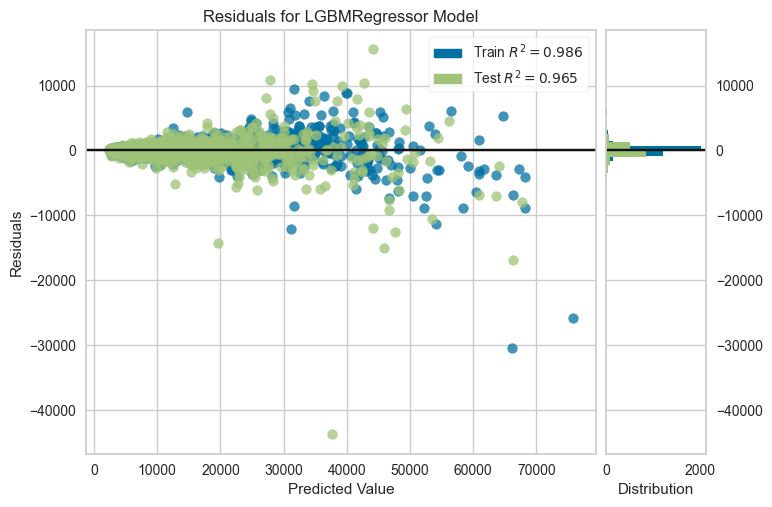

In [24]:
plot_model(tuned_lightgbm)

#### 10.2 Prediction Error Plot（予測誤差プロット）

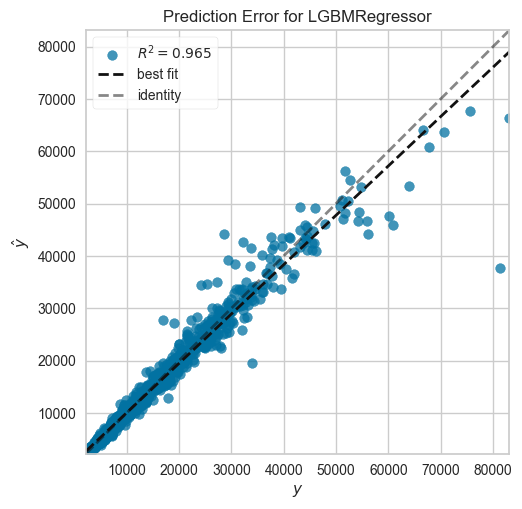

In [25]:
plot_model(tuned_lightgbm, plot='error')

#### 10.3 Feature Importance Plot（特徴量の重要度）

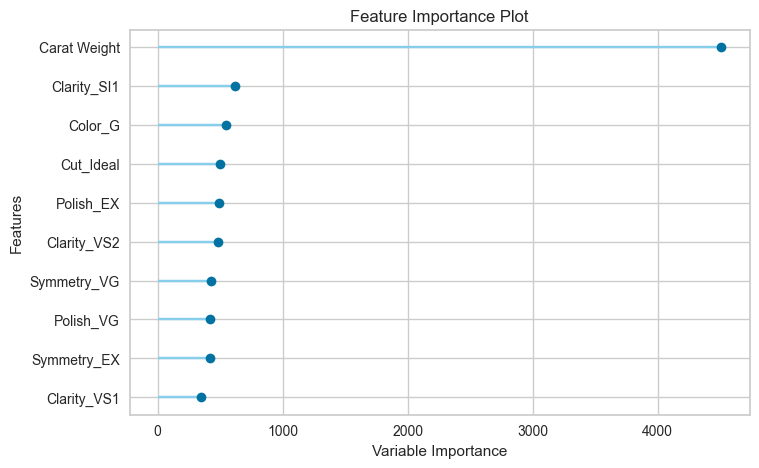

In [26]:
plot_model(tuned_lightgbm, plot='feature')

Another way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

モデルの性能を分析するもう一つの方法は、与えられたモデルに対して利用可能なすべてのプロットを表示するユーザーインターフェースを表示する `evaluate_model()` 関数を使用することです。これは、内部的に `plot_model()` 関数を使用しています。

In [ ]:
evaluate_model(tuned_lightgbm)

### 11.0 Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (1621 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the `tuned_lightgbm` variable we will predict the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

### 11.0 テストでの予測／ホールドアウトサンプル

モデルを確定する前に、テスト/ホールドアウト・セットを予測し、評価指標を確認することで、最終チェックを行うことをお勧めします。上記セクション6の情報グリッドを見ると、データの30％（1621サンプル）がテスト/ホールドアウト・サンプルとして分離されていることがわかります。上記で見た評価指標はすべてトレーニングセット（70％）のみに基づいた交差検証の結果です。では、`tuned_lightgbm`変数に格納されている最終学習済みモデルを用いて、ホールドアウトサンプルを予測し、CV結果と大きく異なるかどうかメトリクスを評価します。

In [27]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3816757.2761,1953.6523,0.9652,0.0787,0.0558


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,6405.760193
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,5872.412022
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,10778.368342
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,2713.936104
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,21534.553191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,12936.837831
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,3493.734351
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,9611.741400
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,5227.172140


The R2 on the test/hold-out set is `0.9652` compared to `0.9708` achieved on `tuned_lightgbm` CV results (in section 9.2 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model`.)

`tuned_lightgbm` CVの結果（上記9.2節）で達成された `0.9708` に対し、テスト/ホールアウトセットでのR2は `0.9652` となりました。これは大きな差ではありません．もしテスト/ホールドアウトとCV結果の間に大きなばらつきがある場合、通常はオーバーフィッティングを示しますが、他のいくつかの要因による可能性もあり、さらなる調査が必要でしょう。この場合、モデルを確定し、未使用データ（最初に分離した、PyCaretに一度も触れていない10％）での予測を進めることになります。

(TIP : `create_model` を使用する際には、常に CV 結果の標準偏差を見るのがよいでしょう。)

### 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

### 12.0 展開のためのモデルの最終化

モデルの確定は、実験の最後のステップです。PyCaret の通常の機械学習ワークフローは `setup()` から始まり、次に `compare_models()` を使って全てのモデルを比較し、ハイパーパラメータチューニング、アンサンブル、スタッキングなどのいくつかのモデリング技術を行うために（関心のあるメトリックに基づいて）いくつかの候補モデルをショートリスト化します。このワークフローは最終的に、新しいデータや未知のデータに対して予測を行う際に使用する最適なモデルを導き出すことになります。`finalize_model()` 関数は、テスト/ホールドアウトサンプル（この例では30%）を含む完全なデータセットにモデルを当てはめます。この関数の目的は、実運用に投入する前に、完全なデータセットでモデルを学習させることです。

In [28]:
final_lightgbm = finalize_model(tuned_lightgbm)
# 15s

In [29]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_lightgbm` under `predict_model()` to compare the information grid with the one above in section 11.

**注意:** 最後に一つ注意点があります。`finalize_model()` を使ってモデルを確定すると、テスト/ホールドアウトセットを含む全データセットが学習に使用されます。そのため、もし `finalize_model()` が使われた後に、そのモデルをホールドアウトセットで予測に使うと、モデリングに使われたのと同じデータで予測しようとしているため、表示される情報グリッドは誤解を招くことになるでしょう。この点のみを示すために、`predict_model()`の下で`final_lightgbm`を使用して、セクション11で上記のものと情報グリッドを比較します。

In [30]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.9160,1199892.0334,1095.3958,0.9891,0.0498,0.0362


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,6751.855464
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,6000.339410
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,11388.163423
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,2836.345904
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,22518.138181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,13096.272663
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,3477.710329
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,9174.238962
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,5194.141841


Notice how the R2 in the `final_lightgbm` has increased to `0.9891` from `0.9652`, even though the model is same. This is because the `final_lightgbm` variable is trained on the complete dataset including the test/hold-out set.

同じモデルであるにもかかわらず、`final_lightgbm`のR2が`0.9652`から`0.9891`に増加していることに注目してください。これは、`final_lightgbm`変数がテスト/ホールドアウトのセットを含む完全なデータセットで学習されるためです。

### 13.0 Predict on Unseen Data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (600 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

### 13.0 未使用のデータで予測する

`predict_model()` 関数は、未使用のデータセットに対して予測を行うためにも使用されます。上記セクション11との唯一の違いは、今回は `data_unseen` パラメータを渡すことです。`data_unseen` はチュートリアルの最初に作成した変数で、PyCaret に公開されていないオリジナルのデータセットの 10% (600 サンプル) が格納されています。(説明はセクション5を参照してください)

In [31]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,707.9033,2268889.5439,1506.2834,0.9779,0.0696,0.0513


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


The `Label` column is added onto the `data_unseen` set. Label is the predicted value using the `final_lightgbm` model. If you want predictions to be rounded, you can use `round` parameter inside `predict_model()`. You can also check the metrics on this since you have actual target column `Price` available. To do that we will use pycaret.utils module. See example below:

`Label` カラムは `data_unseen` セットに追加されます。ラベルは `final_lightgbm` モデルで予測された値である。もし、予測値を丸めたい場合は、 `predict_model()` 内で `round` パラメータを使用します。また、実際のターゲットカラムである `Price` が用意されているので、これに関するメトリクスを確認することができます。そのためには、pycaret.utilsモジュールを使用します。以下の例を参照してください。

In [32]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

### 14.0 Saving the Model

We have now finished the experiment by finalizing the `tuned_lightgbm` model which is now stored in `final_lightgbm` variable. We have also used the model stored in `final_lightgbm` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

### 14.0 モデルの保存

これで `tuned_lightgbm` のモデルを確定し、実験を終了しました。このモデルは現在 `final_lightgbm` 変数に格納されています。また、`final_lightgbm` に格納されたモデルを使用して `data_unseen` を予測しました。これで実験は終わりですが、まだ1つ疑問が残ります。予測する新しいデータが増えたらどうなるのでしょうか？この実験をもう一度やり直す必要があるのでしょうか？答えはノーです。PyCaretの組み込み関数 `save_model()` を使えば、変換パイプライン全体と一緒にモデルを保存して、あとで使うことができます。

In [33]:
save_model(final_lightgbm,'Final_LightGBM_Model_06Nov2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

(TIP : モデルを保存するとき、ファイル名に日付を使うのは常に良いことです。バージョン管理にも役立ちます)

### 15.0 Loading the Saved Model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

### 15.0 保存されたモデルの読み込み

保存したモデルを将来同じ環境または別の環境でロードするには、PyCaret の `load_model()` 関数を使用し、保存したモデルを新しい未使用データに簡単に適用して予測することができます。

In [34]:
saved_final_lightgbm = load_model('Final_LightGBM_Model_06Nov2022')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

一旦モデルが環境にロードされると、同じ `predict_model()` 関数を使用して新しいデータに対して予測することができます。以下では、ロードされたモデルを、上記のセクション13で使用したのと同じ `data_unseen` を予測するために適用しています。

In [35]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,707.9033,2268889.5439,1506.2834,0.9779,0.0696,0.0513


In [36]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

unseen_predictions` と `new_prediction` の結果が同じであることに注意してください。

In [37]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9779

### 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.regression`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to [Regression Tutorial (REG102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)

### 16.0 まとめ／次のステップは？

このチュートリアルでは、データの取り込みから前処理、モデルの学習、ハイパーパラメータのチューニング、予測、あとで使うためのモデルの保存まで、機械学習パイプラインのすべてをカバーすることができました。これらのステップは10個以下のコマンドで完結しており、それらは `create_model()`, `tune_model()`, `compare_models()` など、自然に構成されていて非常に直感的に覚えることができます。PyCaret なしでこの実験全体を再作成すると、ほとんどのライブラリで 100 行を優に超えるコードが必要だったでしょう。

今回は、`pycaret.regression`の基本的な部分のみを取り上げました。次のチュートリアルでは、高度な前処理、アンサンブル、一般化スタッキング、そして機械学習パイプラインを完全にカスタマイズすることができる、データサイエンティストなら知っておくべきほかのテクニックに深く入り込んでいきます。

それでは、次回のチュートリアルでお会いしましょう。[回帰チュートリアル(REG102)-中級レベル](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)へのリンクをたどってください。